In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Environment Preparation
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TensorFlow 1.x selected.
1.15.2


In [2]:
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib import pyplot
import math
import random
import seaborn as sns
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
%matplotlib inline

# read data from csv file and process X, y
def data_loader(data_path):
		# load raw data
    data = pd.read_csv(data_path)

    features = data.columns[0:4]
    labels = data.columns[4]

    # Z-Score normalisation
    for feature in features:
        data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

    X = data[features].astype(np.float32)
    y = pd.get_dummies(data[labels]).astype(np.float32)# One Hot Encode as a dataframe

    return X, y
# Z-score normalisation
def data_normalisation(train, test):
		X_train, y_train = train[0], train[1]
		X_test, y_test = test[0], test[1]

		mean_x, std_x = X_train.mean(axis=0), X_train.std(axis=0)
		mean_y, std_y = y_train.mean(axis=0), y_train.std(axis=0)
	
	
		(X_train, y_train) = ((X_train-mean_x)/std_x, np.log(np.asarray(y_train) + 1))
		(X_test, y_test) = ((X_test-mean_x)/std_x, np.log(np.asarray(y_test) + 1))

		return (X_train, y_train),(X_test, y_test)
  
# split the data into train, val and test set
data_path = "/content/drive/My Drive/Colab Notebooks/Iris.csv"
X, y = data_loader(data_path)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, shuffle=True)

(X_train, y_train),(X_test, y_test) = data_normalisation((X_train, y_train),(X_test, y_test))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120, 22), (30, 4), (30, 22))

In [3]:
#Network parameters
n_input = 4 
n_hidden1, n_hidden2,n_hidden3 = 20, 10, 5
n_output = 22
number_epochs = 100

#Defining the input and the output
X_p = tf.placeholder("float", [None, n_input], name='X_p') 
Y_p = tf.placeholder("float", [None, n_output], name='Y_p')


#Function Definition
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #in_size - rows  out_size - columns
    biases = tf.Variable(tf.random_normal([1, out_size])) #one row
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# forward
def multilayer_perceptron1(input_d):
    #DEFINING WEIGHTS AND BIASES
    b1 = tf.Variable(tf.random_normal([n_hidden1])) #Biases first hidden layer
    b2 = tf.Variable(tf.random_normal([n_output]))  #Biases output layer
    
    w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))   #Weights connecting input layer with first hidden layer
    w2 = tf.Variable(tf.random_normal([n_hidden1, n_output])) #Weights connecting first hidden layer with second hidden layer 

    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(input_d, w1), b1), alpha=0.01) #Task of neurons of first hidden layer
    out_layer = tf.add(tf.matmul(layer_1, w2),b2)            #Task of neurons of output layer
    
    return out_layer
def multilayer_perceptron2(input_d):
#DEFINING WEIGHTS AND BIASES
    b1 = tf.Variable(tf.random_normal([n_hidden1])) #Biases first hidden layer
    b2 = tf.Variable(tf.random_normal([n_hidden2])) #Biases second hidden layer
    b3 = tf.Variable(tf.random_normal([n_output]))  #Biases output layer
    
    w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))   #Weights connecting input layer with first hidden layer
    w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2])) #Weights connecting first hidden layer with second hidden layer 
    w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(input_d, w1), b1), alpha=0.01) #Task of neurons of first hidden layer
    layer_2 = tf.nn.leaky_relu(tf.add(tf.matmul(layer_1, w2), b2), alpha=0.01) #Task of neurons of second hidden layer
    out_layer = tf.add(tf.matmul(layer_2, w3),b3)            #Task of neurons of output layer
    return out_layer
def multilayer_perceptron3(input_d):
#DEFINING WEIGHTS AND BIASES
    b1 = tf.Variable(tf.random_normal([n_hidden1])) #Biases first hidden layer
    b2 = tf.Variable(tf.random_normal([n_hidden2])) #Biases second hidden layer
    b3 = tf.Variable(tf.random_normal([n_hidden3])) #Biases third hidden layer
    b4 = tf.Variable(tf.random_normal([n_output]))  #Biases output layer
    
    w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))   #Weights connecting input layer with first hidden layer
    w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2])) #Weights connecting first hidden layer with second hidden layer 
    w3 = tf.Variable(tf.random_normal([n_hidden2, n_hidden3])) #Weights connecting second hidden layer with third layer
    w4 = tf.Variable(tf.random_normal([n_hidden3, n_output]))  #Weights connecting third hidden layer with output layer


    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(input_d, w1), b1), alpha=0.01) #Task of neurons of first hidden layer
    layer_2 = tf.nn.leaky_relu(tf.add(tf.matmul(layer_1, w2), b2), alpha=0.01) #Task of neurons of second hidden layer
    layer_3 = tf.nn.leaky_relu(tf.add(tf.matmul(layer_2, w3), b3), alpha=0.01) #Task of neurons of thrid layer
    out_layer = tf.add(tf.matmul(layer_3, w4),b4)            #Task of neurons of output layer
    return out_layer


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Fold 1, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 2.7102902, Validation loss: 2.625817, 
Epoch: 40, Training loss: 2.6971078, Validation loss: 2.61327, 
Epoch: 60, Training loss: 2.684001, Validation loss: 2.6007934, 
Epoch: 80, Training loss: 2.6709712, Validation loss: 2.588388, 
Epoch: 100, Training loss: 2.6580153, Validation loss: 2.5760539, 


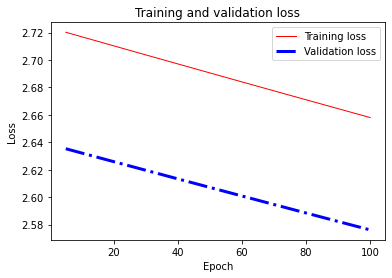

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.6580153, Final Validation loss: 2.5760539, Training accuracy: 0.06481481, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 2, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.1610498, Validation loss: 2.8275797, 
Epoch: 40, Training loss: 3.1437063, Validation loss: 2.8124123, 
Epoch: 60, Training loss: 3.1264706, Validation loss: 2.7973418, 
Epoch: 80, Training loss: 3.109346, Validation loss: 2.7823694, 
Epoch: 100, Training loss: 3.0923414, Validation loss: 2.7674942, 


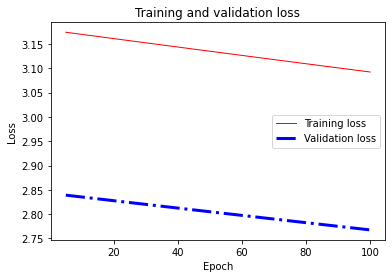

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.0923414, Final Validation loss: 2.7674942, Training accuracy: 0.009259259, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 3, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.2421045, Validation loss: 3.3230124, 
Epoch: 40, Training loss: 3.2249928, Validation loss: 3.3072643, 
Epoch: 60, Training loss: 3.2079797, Validation loss: 3.2916024, 
Epoch: 80, Training loss: 3.1910617, Validation loss: 3.2760246, 
Epoch: 100, Training loss: 3.1742404, Validation loss: 3.26053, 


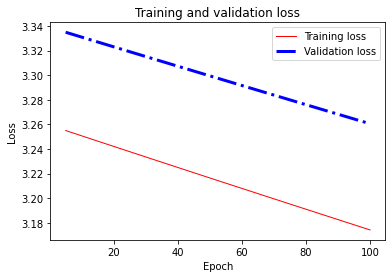

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.1742404, Final Validation loss: 3.26053, Training accuracy: 0.055555556, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 4, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 2.9669003, Validation loss: 3.0025294, 
Epoch: 40, Training loss: 2.952136, Validation loss: 2.9873934, 
Epoch: 60, Training loss: 2.9374754, Validation loss: 2.972317, 
Epoch: 80, Training loss: 2.922919, Validation loss: 2.9573426, 
Epoch: 100, Training loss: 2.9084644, Validation loss: 2.942467, 


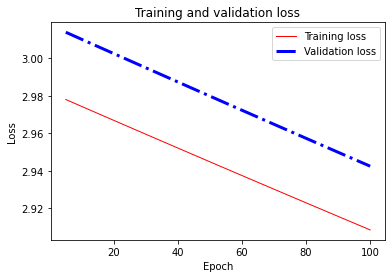

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.9084644, Final Validation loss: 2.942467, Training accuracy: 0.046296295, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 5, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 2.1607542, Validation loss: 2.6422334, 
Epoch: 40, Training loss: 2.1506548, Validation loss: 2.6283965, 
Epoch: 60, Training loss: 2.140617, Validation loss: 2.6146462, 
Epoch: 80, Training loss: 2.1306474, Validation loss: 2.6009846, 
Epoch: 100, Training loss: 2.120732, Validation loss: 2.5874047, 


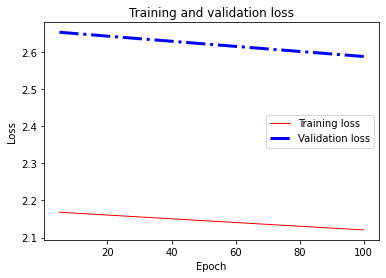

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.120732, Final Validation loss: 2.5874047, Training accuracy: 0.09259259, Validation accuracy: 0.16666667
-------------------------------------------------------------------------------------


Fold 6, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 2.4638011, Validation loss: 1.8675736, 
Epoch: 40, Training loss: 2.4516406, Validation loss: 1.860171, 
Epoch: 60, Training loss: 2.4395542, Validation loss: 1.8528107, 
Epoch: 80, Training loss: 2.4275508, Validation loss: 1.8454666, 
Epoch: 100, Training loss: 2.4156525, Validation loss: 1.8381298, 


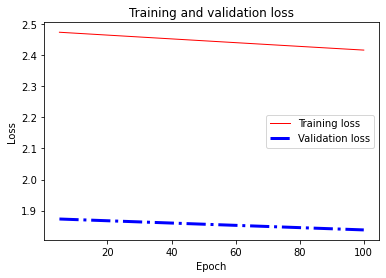

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.4156525, Final Validation loss: 1.8381298, Training accuracy: 0.09259259, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 7, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.64486, Validation loss: 3.2816818, 
Epoch: 40, Training loss: 3.6212232, Validation loss: 3.2623098, 
Epoch: 60, Training loss: 3.597752, Validation loss: 3.2430499, 
Epoch: 80, Training loss: 3.5744383, Validation loss: 3.2238963, 
Epoch: 100, Training loss: 3.5512826, Validation loss: 3.2048514, 


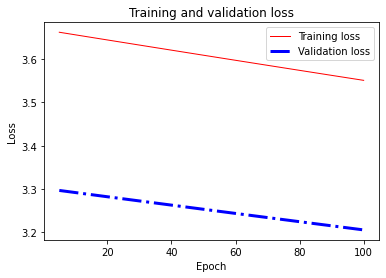

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.5512826, Final Validation loss: 3.2048514, Training accuracy: 0.046296295, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 8, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.5974383, Validation loss: 3.3364499, 
Epoch: 40, Training loss: 3.5734227, Validation loss: 3.3130896, 
Epoch: 60, Training loss: 3.5495703, Validation loss: 3.2898643, 
Epoch: 80, Training loss: 3.525871, Validation loss: 3.266774, 
Epoch: 100, Training loss: 3.502316, Validation loss: 3.2438142, 


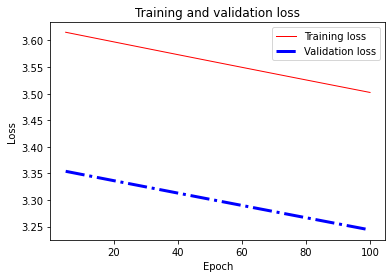

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.502316, Final Validation loss: 3.2438142, Training accuracy: 0.009259259, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 9, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.1511788, Validation loss: 3.0437946, 
Epoch: 40, Training loss: 3.1296682, Validation loss: 3.024415, 
Epoch: 60, Training loss: 3.108313, Validation loss: 3.0051703, 
Epoch: 80, Training loss: 3.0871136, Validation loss: 2.9860594, 
Epoch: 100, Training loss: 3.066069, Validation loss: 2.9670823, 


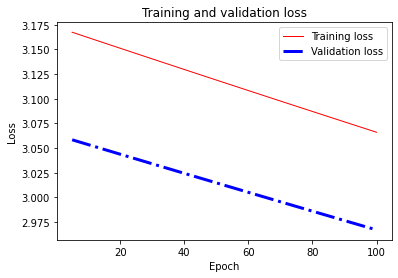

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.066069, Final Validation loss: 2.9670823, Training accuracy: 0.06481481, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 10, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1
Epoch: 20, Training loss: 3.7512355, Validation loss: 3.7015805, 
Epoch: 40, Training loss: 3.7275312, Validation loss: 3.6762447, 
Epoch: 60, Training loss: 3.7039392, Validation loss: 3.6510305, 
Epoch: 80, Training loss: 3.680483, Validation loss: 3.6259549, 
Epoch: 100, Training loss: 3.6571646, Validation loss: 3.6010282, 


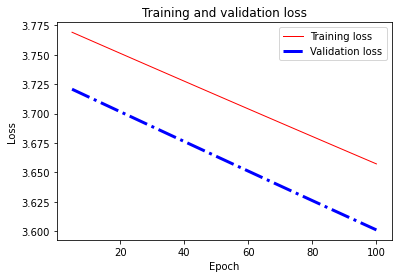

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.6571646, Final Validation loss: 3.6010282, Training accuracy: 0.018518519, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


For the model with learning rate: 0.001, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron1 

Average Training accuracy for the 10 folds: 0.049999997 

Average Validation accuracy for the 10 folds: 0.05 


-------------------------------------------------------------------------------------


Fold 1, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 4.4612875, Validation loss: 4.215985, 
Epoch: 40, Training loss: 4.3336134, Validation loss: 4.0975842, 
Epoch: 60, Training loss: 4.2109084, Validation loss: 3.9848633, 
Epoch: 80, Training loss: 4.0939827, Validation loss: 3.8772352, 
Epoch: 100, Training loss: 3.981779, Validation loss: 3.77373

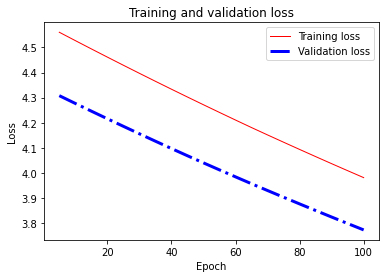

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.981779, Final Validation loss: 3.7737308, Training accuracy: 0.027777778, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 2, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 6.355927, Validation loss: 6.422647, 
Epoch: 40, Training loss: 6.1799693, Validation loss: 6.2322774, 
Epoch: 60, Training loss: 6.011707, Validation loss: 6.049721, 
Epoch: 80, Training loss: 5.8505306, Validation loss: 5.874558, 
Epoch: 100, Training loss: 5.6970034, Validation loss: 5.7067018, 


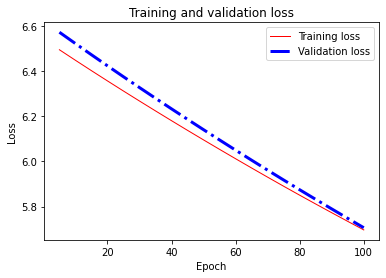

<Figure size 432x288 with 0 Axes>

Final Training loss: 5.6970034, Final Validation loss: 5.7067018, Training accuracy: 0.027777778, Validation accuracy: 0.25
-------------------------------------------------------------------------------------


Fold 3, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 4.15933, Validation loss: 4.741036, 
Epoch: 40, Training loss: 3.8726056, Validation loss: 4.4864826, 
Epoch: 60, Training loss: 3.612273, Validation loss: 4.2527003, 
Epoch: 80, Training loss: 3.3817592, Validation loss: 4.0401554, 
Epoch: 100, Training loss: 3.1775587, Validation loss: 3.8443017, 


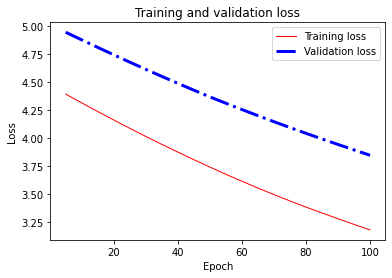

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.1775587, Final Validation loss: 3.8443017, Training accuracy: 0.037037037, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 4, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 4.260862, Validation loss: 5.2590575, 
Epoch: 40, Training loss: 4.139937, Validation loss: 5.111905, 
Epoch: 60, Training loss: 4.023091, Validation loss: 4.970087, 
Epoch: 80, Training loss: 3.911654, Validation loss: 4.8321958, 
Epoch: 100, Training loss: 3.8053994, Validation loss: 4.699251, 


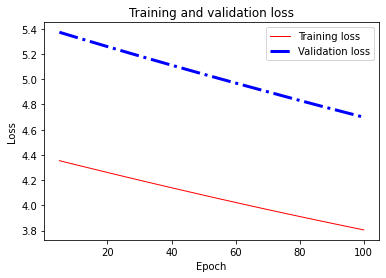

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.8053994, Final Validation loss: 4.699251, Training accuracy: 0.046296295, Validation accuracy: 0.25
-------------------------------------------------------------------------------------


Fold 5, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 5.486068, Validation loss: 4.533282, 
Epoch: 40, Training loss: 5.2346444, Validation loss: 4.3156385, 
Epoch: 60, Training loss: 4.9958596, Validation loss: 4.1106944, 
Epoch: 80, Training loss: 4.768462, Validation loss: 3.9191377, 
Epoch: 100, Training loss: 4.551777, Validation loss: 3.7402017, 


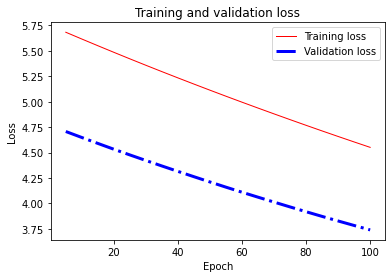

<Figure size 432x288 with 0 Axes>

Final Training loss: 4.551777, Final Validation loss: 3.7402017, Training accuracy: 0.046296295, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 6, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 8.903329, Validation loss: 6.990505, 
Epoch: 40, Training loss: 8.537907, Validation loss: 6.7187433, 
Epoch: 60, Training loss: 8.188441, Validation loss: 6.459336, 
Epoch: 80, Training loss: 7.8531704, Validation loss: 6.2110615, 
Epoch: 100, Training loss: 7.532257, Validation loss: 5.9740214, 


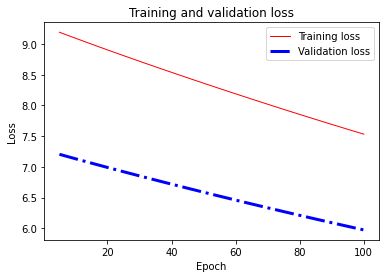

<Figure size 432x288 with 0 Axes>

Final Training loss: 7.532257, Final Validation loss: 5.9740214, Training accuracy: 0.027777778, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 7, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 7.1607795, Validation loss: 6.674001, 
Epoch: 40, Training loss: 6.9094057, Validation loss: 6.429664, 
Epoch: 60, Training loss: 6.6685266, Validation loss: 6.1956906, 
Epoch: 80, Training loss: 6.4387183, Validation loss: 5.9727893, 
Epoch: 100, Training loss: 6.219573, Validation loss: 5.761712, 


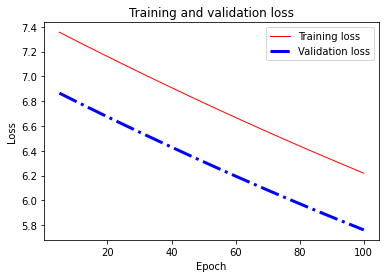

<Figure size 432x288 with 0 Axes>

Final Training loss: 6.219573, Final Validation loss: 5.761712, Training accuracy: 0.018518519, Validation accuracy: 0.16666667
-------------------------------------------------------------------------------------


Fold 8, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 3.9731622, Validation loss: 3.699617, 
Epoch: 40, Training loss: 3.8283896, Validation loss: 3.5714784, 
Epoch: 60, Training loss: 3.6888835, Validation loss: 3.4474525, 
Epoch: 80, Training loss: 3.5552037, Validation loss: 3.3275805, 
Epoch: 100, Training loss: 3.4272192, Validation loss: 3.2127352, 


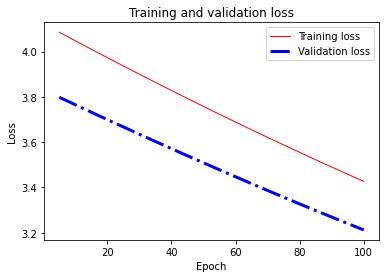

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.4272192, Final Validation loss: 3.2127352, Training accuracy: 0.055555556, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 9, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 4.3512096, Validation loss: 3.6691978, 
Epoch: 40, Training loss: 4.225147, Validation loss: 3.5665812, 
Epoch: 60, Training loss: 4.1039953, Validation loss: 3.4677203, 
Epoch: 80, Training loss: 3.9870327, Validation loss: 3.372421, 
Epoch: 100, Training loss: 3.8743982, Validation loss: 3.2809374, 


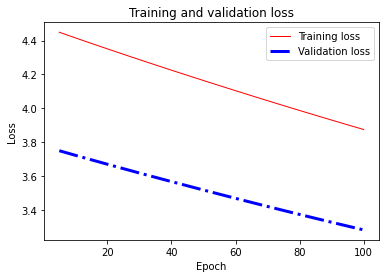

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.8743982, Final Validation loss: 3.2809374, Training accuracy: 0.037037037, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 10, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2
Epoch: 20, Training loss: 3.054254, Validation loss: 3.163228, 
Epoch: 40, Training loss: 2.9910538, Validation loss: 3.0948467, 
Epoch: 60, Training loss: 2.9302435, Validation loss: 3.0290751, 
Epoch: 80, Training loss: 2.8715632, Validation loss: 2.9658463, 
Epoch: 100, Training loss: 2.8151505, Validation loss: 2.9054375, 


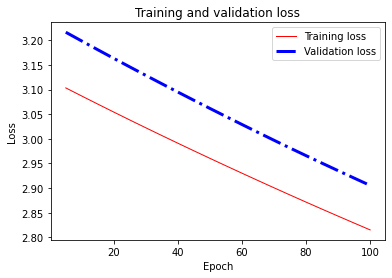

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.8151505, Final Validation loss: 2.9054375, Training accuracy: 0.018518519, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


For the model with learning rate: 0.001, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron2 

Average Training accuracy for the 10 folds: 0.04212963 

Average Validation accuracy for the 10 folds: 0.06666667 


-------------------------------------------------------------------------------------


Fold 1, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron3
Epoch: 20, Training loss: 2.9747791, Validation loss: 2.2739158, 
Epoch: 40, Training loss: 2.869002, Validation loss: 2.2032695, 
Epoch: 60, Training loss: 2.7721317, Validation loss: 2.1399088, 
Epoch: 80, Training loss: 2.684274, Validation loss: 2.0817206, 
Epoch: 100, Training loss: 2.602836, Validation loss: 2.0

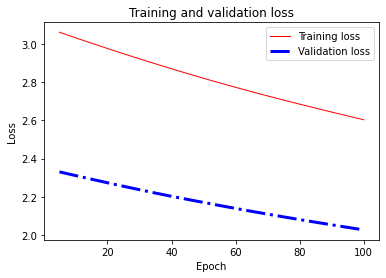

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.602836, Final Validation loss: 2.0278301, Training accuracy: 0.0, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 2, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron3
Epoch: 20, Training loss: 5.372259, Validation loss: 5.460665, 
Epoch: 40, Training loss: 4.7023845, Validation loss: 4.8462873, 
Epoch: 60, Training loss: 4.1463475, Validation loss: 4.329251, 
Epoch: 80, Training loss: 3.6776834, Validation loss: 3.8941715, 
Epoch: 100, Training loss: 3.2923522, Validation loss: 3.5206678, 


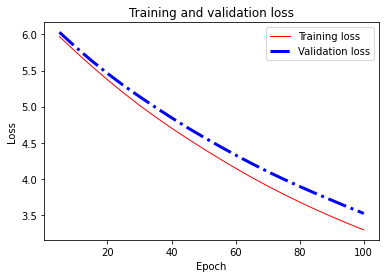

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.2923522, Final Validation loss: 3.5206678, Training accuracy: 0.037037037, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 3, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron3
Epoch: 20, Training loss: 8.5527115, Validation loss: 9.559758, 
Epoch: 40, Training loss: 6.874972, Validation loss: 7.8002477, 
Epoch: 60, Training loss: 5.5185637, Validation loss: 6.3800507, 
Epoch: 80, Training loss: 4.419337, Validation loss: 5.1629057, 
Epoch: 100, Training loss: 3.5377362, Validation loss: 4.165613, 


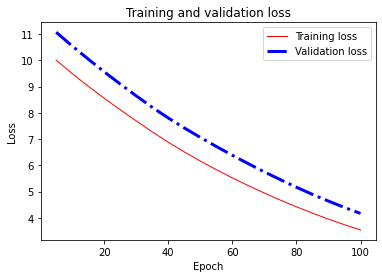

<Figure size 432x288 with 0 Axes>

Final Training loss: 3.5377362, Final Validation loss: 4.165613, Training accuracy: 0.074074075, Validation accuracy: 0.083333336
-------------------------------------------------------------------------------------


Fold 4, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron3
Epoch: 20, Training loss: 4.5716, Validation loss: 3.8729393, 
Epoch: 40, Training loss: 3.9152453, Validation loss: 3.433954, 
Epoch: 60, Training loss: 3.3613884, Validation loss: 3.0413897, 
Epoch: 80, Training loss: 2.9017105, Validation loss: 2.6922174, 
Epoch: 100, Training loss: 2.5130444, Validation loss: 2.380535, 


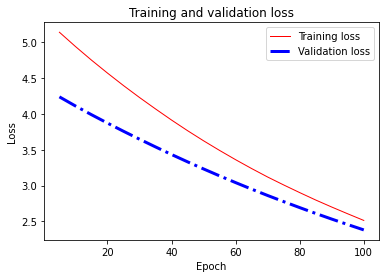

<Figure size 432x288 with 0 Axes>

Final Training loss: 2.5130444, Final Validation loss: 2.380535, Training accuracy: 0.046296295, Validation accuracy: 0.0
-------------------------------------------------------------------------------------


Fold 5, lr: 0.001, type_loss_func: sigmoid_cross_entropy, type_optimizer: GradientDescent, neural_network_structure: multilayer_perceptron3
Epoch: 20, Training loss: 12.797687, Validation loss: 14.501358, 
Epoch: 40, Training loss: 10.85619, Validation loss: 12.3973, 
Epoch: 60, Training loss: 9.280436, Validation loss: 10.642227, 
Epoch: 80, Training loss: 7.992778, Validation loss: 9.208354, 


KeyboardInterrupt: ignored

In [4]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

train_x = []
test_x = []
train_y = []
test_y = []
accuracy_buffer = []
select_epoch_from = 0

train_loss = 0
val_loss = 0

# record the train losses for the total 10 fold models
kfold_train_losses = []
# record the validate losses for the total 10 fold models
kfold_val_losses = []

hyperParameters = {'lr':[0.001,0.003,0.005,0.007],'type_loss_func':["sigmoid_cross_entropy","softmax_cross_entropy"],'type_optimizer':["GradientDescent","RMSProp","Momentum","Adam"],'neural_network_structure':["multilayer_perceptron1","multilayer_perceptron2","multilayer_perceptron3"]}

accuracies = []
bset_lr = 0
best_loss_func = ""
best_type_optimizer = ""
best_neural_network_structure = ""
best_training_accuracy = 0
best_validation_accuracy = 0

start_time = time.clock()
with tf.Session() as sess: 
    for lr in hyperParameters['lr']:
        for type_loss_func in hyperParameters['type_loss_func']:
            for type_optimizer in hyperParameters['type_optimizer']:
                for neural_network_structure in hyperParameters['neural_network_structure']:
                    fold = 0
                    for train_index, val_index in kf.split(X_train, y_train):
                        if neural_network_structure == "multilayer_perceptron1":
                           neural_network = multilayer_perceptron1(X_p)
                        elif neural_network_structure == "multilayer_perceptron2":
                             neural_network = multilayer_perceptron2(X_p)
                        elif neural_network_structure == "multilayer_perceptron3":
                             neural_network = multilayer_perceptron3(X_p)
                            #mse_1 = tf.keras.losses.MeanSquaredError()
                            #RMSE_pre = mse_1(neural_network,Y_p)
                            #eval_RMSE = tf.cast(tf.sqrt(RMSE_pre),dtype=tf.float32)
                            # define eval function
                        prediction = tf.nn.softmax(neural_network)
                        correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(Y_p,1)) 
                        accuracy_func = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                           
                        if type_loss_func == "softmax_cross_entropy":
                           loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y_p))
                        elif type_loss_func == "sigmoid_cross_entropy":
                             loss_func = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=neural_network,labels=Y_p))
                            
                        # define optimizer
                        if type_optimizer == "GradientDescent":
                           optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss_func)
                        elif type_optimizer == "RMSProp":
                             optimizer = tf.train.RMSPropOptimizer(lr).minimize(loss_func)
                        elif type_optimizer == "Momentum":
                             optimizer = tf.train.MomentumOptimize(lr).minimize(loss_func)
                        elif type_optimizer == "Adam":
                             optimizer = tf.train.AdamOptimizer(lr).minimize(loss_func)
                        # initializaing variables
                        init = tf.global_variables_initializer()
                        sess.run(init)
                         
                        fold = fold + 1
                        train_x = X_train[train_index]
                        train_y = y_train[train_index]
                        val_x = X_train[val_index]
                        val_y = y_train[val_index]
                              
                        print("Fold %s, lr: %s, type_loss_func: %s, type_optimizer: %s, neural_network_structure: %s" % (fold,lr,type_loss_func,type_optimizer,neural_network_structure))
                
                        train_losses = []
                        val_losses = []
                        epochs = []
                        for epoch in range(1,number_epochs+1):
                            _, train_loss = sess.run([optimizer, loss_func], feed_dict={X_p: train_x, Y_p: train_y})
                            val_loss = loss_func.eval({X_p: val_x, Y_p: val_y})

                            if epoch >= select_epoch_from and epoch % 5 == 0:
                               train_losses.append(train_loss)
                               val_losses.append(val_loss)
                               epochs.append(epoch)

                            #Display the epoch
                            if epoch % 20 == 0:
                               print("Epoch: %d, "
                                     "Training loss: %s, "
                                     "Validation loss: %s, " % (epoch, train_loss, val_loss))
                         
                        pyplot.plot(epochs, train_losses, 'r', label='Training loss', linewidth=1, linestyle='-')
                        pyplot.plot(epochs, val_losses, 'b', label='Validation loss', linewidth=3, linestyle='-.')
                        pyplot.xlabel('Epoch') 
                        pyplot.ylabel('Loss')
                        pyplot.title('Training and validation loss')
                        pyplot.legend()
                        pyplot.figure()
                        pyplot.show()
                        pyplot.ioff()

                        kfold_train_accuracy = sess.run(accuracy_func,feed_dict={X_p:train_x, Y_p:train_y})
                        kfold_val_accuracy = sess.run(accuracy_func,feed_dict={X_p:val_x, Y_p:val_y})
                      
                        print("Final Training loss: %s, "
                              "Final Validation loss: %s, " 
                              "Training accuracy: %s, "
                              "Validation accuracy: %s"% (train_loss, val_loss, kfold_train_accuracy, kfold_val_accuracy )) 
                        print("-------------------------------------------------------------------------------------\n\n")

                        kfold_train_losses.append(kfold_train_accuracy)
                        kfold_val_losses.append(kfold_val_accuracy)
  
                        if fold == 10:
                           # average train RMSE for the 10 folds
                           average_train_accuracy_score_10fold = np.mean(kfold_train_losses)
                           # average validate RMSE for the 10 folds
                           average_val_accuracy_score_10fold = np.mean(kfold_val_losses)
                           print("For the model with learning rate: %s, type_optimizer: %s, neural_network_structure: %s \n" % (lr,type_optimizer,neural_network_structure))
                           print("Average Training accuracy for the 10 folds: %s \n" % str(average_train_accuracy_score_10fold))
                           print("Average Validation accuracy for the 10 folds: %s \n\n" % str(average_val_accuracy_score_10fold))
                           print("-------------------------------------------------------------------------------------\n\n")
                           if lr == 0.001 and type_loss_func == "sigmoid_cross_entropy" and type_optimizer == "GradientDescent" and neural_network_structure == "multilayer_perceptron1":
                              #best_training_rmse = average_train_rmse_score_10fold
                              best_validation_accuracy = average_val_accuracy_score_10fold
                              best_lr = 0.001
                              best_loss_func = "sigmoid_cross_entropy"
                              best_type_optimizer = "GradientDescent"
                              best_neural_network_structure = "multilayer_perceptron1"
                           else: 
                              if average_val_accuracy_score_10fold < best_validation_accuracy:                
                                 best_validation_accuracy = average_val_accuracy_score_10fold
                                 best_lr = lr
                                 best_loss_func = type_loss_func
                                 best_type_optimizer = type_optimizer
                                 best_neural_network_structure = neural_network_structure
    print("The best hyperparameters:\n") 
    print("learning rate: %s, type_loss_func: %s, type_optimizer: %s, neural_network_structure: %s, RMSE: %s\n" % (best_lr,best_type_optimizer,best_neural_network_structure,best_validation_rmse))
    end_time = time.clock()
    print("The total training time is: " + str(end_time-start_time))
    # Test model
    #pred = (neural_network) 
    #output=neural_network.eval({X_p: X_test}) 

    # Test model 
    output = prediction.eval({X_p: X_test})
    id_pred = np.argmax(output, axis=1) + 1
    id_label = np.argmax(np.asarray(y_test), axis=1) + 1
    print(id_label)
    print(id_pred)
    plt.plot(range(0,len(id_label)), id_label, 'ro',label = "labels", markersize=7) 
    plt.plot(range(0,len(id_label)), id_pred, 'bx',label = "predictions", markersize=9) 
    plt.legend(loc="upper right")
    for i in range(1,4):
        plt.axhline(y = i, linestyle='-', color = 'k', linewidth = 1)
        plt.yticks(range(0,5))
        plt.title('Predictions and Labels')
        plt.ylabel('Classes')
        plt.xlabel('Instance')
        plt.show()

    # final accuracy
    accuracy = sess.run(accuracy_func,feed_dict={X_p:X_test,Y_p:y_test})
    print("Accuracy: " + str(accuracy))
    accuracy_buffer.append(accuracy)
  
print("Average accuracy is:" + str(np.asarray(accuracy_buffer).mean()))
